In [57]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()

print(digits.DESCR)
print(digits.data.shape)
print(digits.data[0])
print(digits.images.shape)
print(digits.images[0])
print(digits.keys())
print(digits.data)
print(digits.target)
print(digits.frame)
print(digits.feature_names)
print(digits.target_names)
#print(digits.images)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

[1126 1459  860 1294 1130 1095 1724 1044 1638  121  466 1238  330 1482
   87 1396 1123  871 1687  130 1685 1332  769  343 1515 1437  805  385
 1215  955  276 1184  459 1337   21  252  747  856 1584  474 1082  510
 1705 1499  699  975  189  957  686  957  562 1590 1267  831 1528 1154
 1508  646   20  840  166 1297  387  600  315   13  241  776 1369  564
  897 1363   91 1390  955 1478 1451  508  775   34  205 1104 1585 1411
 1025 1021 1413  565 1129 1795 1500  702  401  729 1579  161  201  995
  269  815]
3


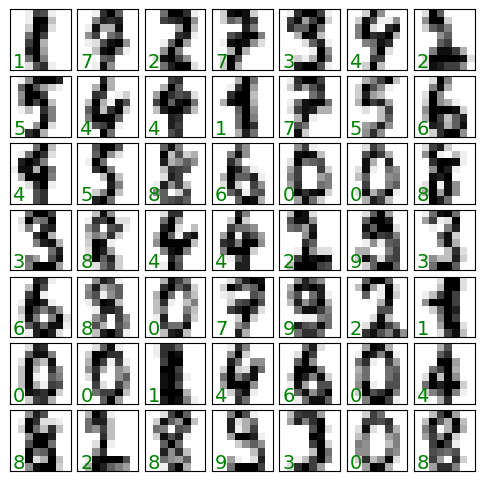

In [28]:
fig, axes = plt.subplots(7,7, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100) 
print(mychoices) #indexes of images we will plot #IN DIGITS FILE, NUMBERS ARE ORDERED 
print(digits.target[mychoices[0]]) #1

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), cmap='binary')
    #ax.imshow((digits.images[i]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    #ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

**Part 1. Unsupervised Learning: Dimensionality Reduction on Digits**
Every istance is defined by 64 attributes (the color of each of 8X8 pixels). Difficult to visualize, we need to reduce the dimensionality from 1797 X 64 to 1797 X 2 to plot.

In [38]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
data_projected = isomap.fit_transform(digits.data)
#data_projected.shape

print(digits.target[0])
print(digits.data[0])
print(data_projected[0])
print(digits.target[1])
print(digits.data[1])
print(data_projected[1])

/home/robertoinfurna/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/robertoinfurna/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[162.58881242  27.21966931]
1
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[-46.79288172  48.38888043]


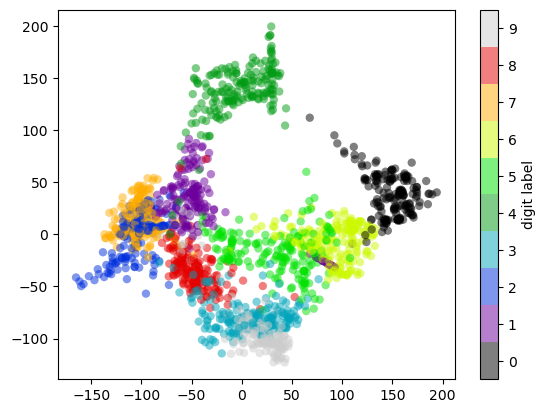

In [16]:
def discrete_cmap(N, base_cmap=None): #Create an N-bin discrete colormap from the specified input map

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.colormaps[base_cmap]
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none', alpha=0.5, cmap=discrete_cmap(10,'nipy_spectral'))

# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))

# Make it clear which color goes with which label
plt.clim(-0.5, 9.5)


Digits are fairly well-separated in the parameter space. This tells us that a supervised classification algorithm should perform fairly well.

**Part 3: Supervised, classification**

1. Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need sklearn.model_selection.train_test_split.

2. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).

3. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

4. The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

In [39]:
from sklearn.model_selection import train_test_split

# taking 80% of the data as a training set
# I'm classifing the full 64-dimensional dataset. I'm not using the dimensionality reduction above. 
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)


(1437, 64) (360, 64)


In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', max_iter=2000,solver='sag')
clf.fit(Xtrain, ytrain)



LogisticRegression(max_iter=2000, solver='sag')

In [46]:
ypred = clf.predict(Xtest)
#accuracy_score(ytest, ypred)


In [47]:
ypredtrain = clf.predict(Xtrain)
#accuracy_score(ytrain, ypredtrain)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


/tmp/ipykernel_172334/1150895801.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation='nearest');


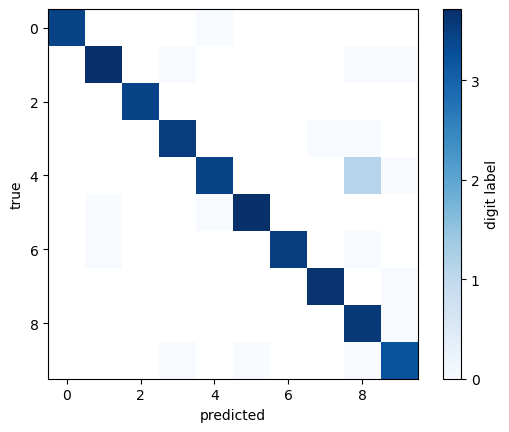

In [69]:
#CONFUSION MATRIX: how many numbers of target i were instead classified by the algorithm in target j 
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest, ypred))
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap='Blues', interpolation='nearest');
plt.ylabel('true')
plt.xlabel('predicted')
#plt.colorbar(label='digit label', ticks=range(10)) #discrete color map

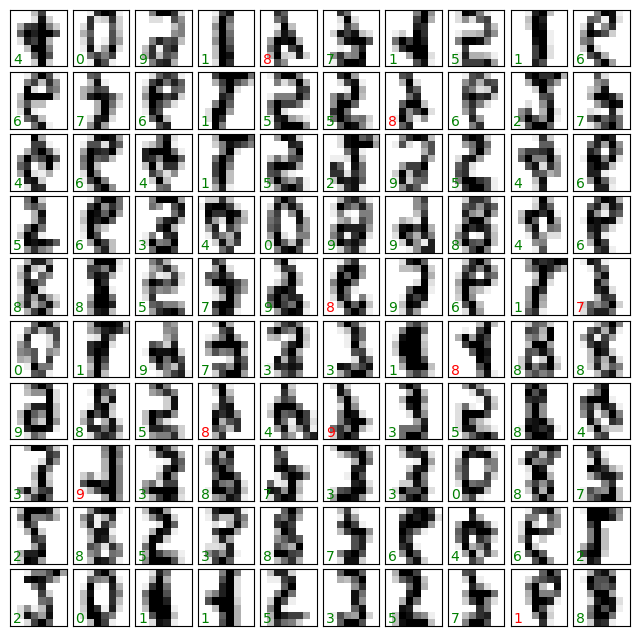

In [70]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(Xtest[i].reshape(8, 8)), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]), transform=ax.transAxes, 
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])






**PENGUINS**

In [54]:
from palmerpenguins import load_penguins
penguins = load_penguins()

In [63]:
penguins.head(len(penguins))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


344 istances, 3 targets (Adelie, Gentoo, Chinstrap), 5 attributes (island,bill_lenght_mm,bill_depth_mm, flipper_lenght_mm,body_mass_g). (sex and year not influent?)

In [68]:
# import image module 
from IPython.display import Image 
from IPython.display import display

x = Image(url="images/adelie_penguin.png", width=300, height=300) 
y = Image(url="images/gentoo_penguin.png", width=300, height=300) 
z = Image(url="images/chinstrap_penguin.png", width=300, height=300) 
display(x, y, z)
  
# get the image 
#Image(url="images/adelie_penguin.png", width=300, height=300) 

In [ ]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')